In [104]:
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from itertools import combinations as combos

In [105]:
df = pd.read_table("In-class_network.txt")
df

,ID,IDs-of-acquaintances,sex,age,department,time-to-bed,Unnamed: 6
0,1,58,m,21,phys,after-0,NaN
1,2,"56,34,25",f,18,stat,after-0,NaN
2,4,"13,18,66,61,5,10",m,19,stat,after-0,NaN
3,5,"66,13,18",m,18,stat,after-0,NaN
4,6,"19,53,38",m,20,stat,after-0,NaN
5,7,"3,21,17,69,63",f,24,stat,after-0,NaN
6,8,"70,20",m,21,csie,after-0,NaN
7,9,"40,51,39,32,46,27,71,24",m,22,stat,after-0,NaN
8,12,"65,39,9,24,22",m,21,stat,before-0,NaN
9,13,"4,66,18,61",m,19,stat,after-0,NaN


In [106]:
df.drop(df.columns[6],axis=1,inplace=True)
df

,ID,IDs-of-acquaintances,sex,age,department,time-to-bed
0,1,58,m,21,phys,after-0
1,2,"56,34,25",f,18,stat,after-0
2,4,"13,18,66,61,5,10",m,19,stat,after-0
3,5,"66,13,18",m,18,stat,after-0
4,6,"19,53,38",m,20,stat,after-0
5,7,"3,21,17,69,63",f,24,stat,after-0
6,8,"70,20",m,21,csie,after-0
7,9,"40,51,39,32,46,27,71,24",m,22,stat,after-0
8,12,"65,39,9,24,22",m,21,stat,before-0
9,13,"4,66,18,61",m,19,stat,after-0


In [107]:
G = nx.Graph()
node = []

for i in range(len(df)):
    if df['IDs-of-acquaintances'][i] == ' ':
        node.append(int(df["ID"][i]))
        G.add_nodes_from(node)   

In [108]:
df = df[df['IDs-of-acquaintances'] != ' ']
df
d = df.set_index('ID')['IDs-of-acquaintances']
d = {k: [int(i) for i in v.split(',')] for k, v in d.items()} 
for k, v in d.items():
    G.add_edges_from(([(k, t) for t in v]))

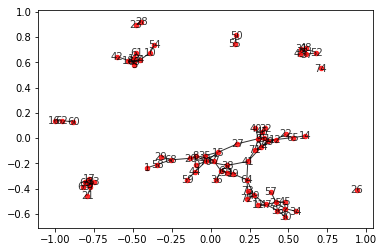

In [109]:
nx.draw_networkx(G,node_size=20,alpha=.8,font_size=10) #3-a

In [110]:
nx.info(G)
#Number of nodes: 75
#Number of edges: 109
#Average degree: 2.9067

'Name: \nType: Graph\nNumber of nodes: 75\nNumber of edges: 109\nAverage degree:   2.9067'

In [111]:
G.number_of_edges()/G.number_of_nodes()

1.4533333333333334

In [112]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

45

In [113]:
G.size()/(G.number_of_nodes()*(G.number_of_nodes()-1)/2)

0.03927927927927928

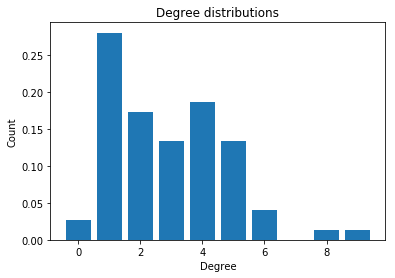

,0,1,2
0,1,21,0.280000
1,5,10,0.133333
2,9,1,0.013333
3,8,1,0.013333
4,3,10,0.133333
5,4,14,0.186667
6,6,3,0.040000
7,2,13,0.173333
8,0,2,0.026667


In [114]:
G_degree = []
for i in range(len(G.degree)):
    G_degree.append(G.degree(i))

G_degree_count=[]
for i in range(len(G_degree)):
    G_degree_count.append((sorted(G_degree)[i],G_degree.count(sorted(G_degree)[i])))

G_degree_count=pd.DataFrame(list(set(G_degree_count)))
G_degree_count[2]=G_degree_count[1]/sum(G_degree_count[1])

plt.bar(G_degree_count[0],G_degree_count[2])
plt.title("Degree distributions")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()
G_degree_count


In [115]:
sum(nx.triangles(G).values())/3

52.0